<a href="https://colab.research.google.com/github/khanh22mse23057/Semester2-DIP/blob/main/image_video_processing_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Reading an Image**

The python libraries cv2 needed to be imported before reading an image.

In [ ]:
import urllib as URL
import requests

!wget https://raw.githubusercontent.com/khanh22mse23057/Semester2-DIP/main/image_test.zip 


--2023-02-21 12:48:44--  https://raw.githubusercontent.com/khanh22mse23057/Semester2-DIP/main/image_test.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1266035 (1.2M) [application/zip]
Saving to: ‘image_test.zip.2’

image_test.zip.2    100%[===================>]   1.21M  --.-KB/s    in 0.05s   

2023-02-21 12:48:44 (22.9 MB/s) - ‘image_test.zip.2’ saved [1266035/1266035]



In [ ]:
# !rm -R ./image_test
!if [ -d ./images ]; then rm -Rf .images/; fi
!if [ -d ./output ]; then rm -Rf .output/; fi
!mkdir ./output
!unzip /content/image_test.zip 
!mv image_test images
!ls /content/images

mkdir: cannot create directory ‘./output’: File exists
Archive:  /content/image_test.zip
   creating: image_test/
  inflating: image_test/earth1.tif   
  inflating: image_test/earth2.tif   
  inflating: image_test/live.jpg     
  inflating: image_test/mask.jpg     
 extracting: image_test/mask1.png    
 extracting: image_test/mask2.png    
  inflating: image_test/moon.tif     
 extracting: image_test/pcbCropped.png  
 extracting: image_test/pcbCroppedTranslatedDefected.png  
  inflating: image_test/quadnight.jfif  
  inflating: image_test/rice.jfif    
  inflating: image_test/tire.tif     
mv: cannot move 'image_test' to 'images/image_test': Directory not empty
earth1.tif  mask1.png  pcbCropped.png			 tire.tif
earth2.tif  mask2.png  pcbCroppedTranslatedDefected.png
image_test  mask.jpg   quadnight.jfif
live.jpg    moon.tif   rice.jfif


In [ ]:
import cv2 
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


from io import BytesIO
from PIL import Image
%matplotlib inline

In [ ]:
def im2double(imgPath):
   img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
   if img is not None:
      img = img.astype(np.float32) / 255.0 # Divide all values by the largest possible value in the datatype
   return img 

The function `cv2.imread()` is used to read an image. This function takes 2 arguments. The first argument is the image path. The image path can be just the name of the image if it is in the working directory else the full path needs to be specified.
The second argument is a flag that specifies the way the image should be read. There are 3 flag options:
1. `cv2.IMREAD_COLOR` : Loads a color image. Any transparency of image will be neglected. It is the default flag.
2. `cv2.IMREAD_GRAYSCALE` : Loads image in grayscale mode.
3. `cv2.IMREAD_UNCHANGED` : Loads image as such including alpha channel.

These flags can be used directly instead of using the integers 1, 0 and -1 respectively.

In [ ]:
img_color = cv2.imread('./images/earth1.tif')
img_grayscale = cv2.imread('./images/live.jpg')
img_unchanged = cv2.imread('./images/quadnight.jfif')

##Displaying an image
The function `cv2.imshow()` is used to display an image in a window. This function takes 2 arguments. The first argument is the window name (Specify unique window names to display multiple images) and the second argument is the image to be displayed.

`cv2.waitKey()` is a keyboard binding function. Its argument is the time in milliseconds. The function waits for specified milliseconds for any keyboard event. If you press any key in that time, the program continues. If 0 is passed, it waits indefinitely for a key stroke. It can also be set to detect specific keystrokes like the Q key or the ESC key on the keyboard. 

`cv2.destroyAllWindows()` simply destroys all the windows we created. If you want to destroy any specific window, use the function `cv2.destroyWindow()` where you pass the exact window name as the argument.

All the OpenCV interactive functions won't work in any Jupyter/Colab notebook environment. So, we won't be able to use `cv2.imshow()` like the following here. We will Matplotlib instead.

In [ ]:
### The below won't work ###
"""
cv2.imshow('color image',img_color)
cv2.imshow('grayscale image',img_grayscale)
cv2.imshow('unchanged image',img_unchanged)
"""

"\ncv2.imshow('color image',img_color)\ncv2.imshow('grayscale image',img_grayscale)\ncv2.imshow('unchanged image',img_unchanged)\n"

The function `cv2.imshow()` opens a window displaying the image and therefore cannot be used in a Colab notebook. We can instead use Matplotlib to display image in the notebook. To use Matplotlib, we need to import the `matplotlib` library.
</br>NOTE: ***Google colab crashes if you try to display image using cv2.imshow() instead import from google.colab.patches import cv2_imshow and display using cv2_imshow(<image>)***

In [ ]:
# cv2_imshow(img_color)

The function `plt.imshow()` is used to specify the image to be displayed and the function plt.show() is used to display it.

To hide the tick values on x and y axis, the function `plt.axis("off")` can be used.

In [ ]:
# plt.imshow(img_color)
# plt.axis("off")
# plt.show()

The displayed image isn't as expected. This happens because OpenCV represents RGB images as multi-dimensional NumPy array but in the reverse order. This means that images are actually represented in BGR order rather than RGB. This can be corrected by converting BGR to RGB.

In [ ]:
# plt.axis("off")
# plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
# plt.show()

In [ ]:
# plt.imshow(cv2.cvtColor(img_grayscale, cv2.COLOR_BGR2RGB))
# plt.axis("off")
# plt.show()

In [ ]:
# plt.imshow(cv2.cvtColor(img_unchanged, cv2.COLOR_BGR2RGB))
# plt.axis("off")
# plt.show()

##Writing an image
The function `cv2.imwrite()` is used to write an image.
It takes 2 arguments, first argument is the file name, second argument is the image you want to save. The below code will save the image in the working directory

In [ ]:
# cv2.imwrite('grayscale.png',img_grayscale)

In [ ]:
# Check Image Information
def image_infor(image):
  # Check the image matrix data type (could know the bit depth of the image)
  print(image.dtype)
  # Check the height of image 
  print(image.shape[0])
  # Check the width of image 
  print(image.shape[1])
  # Check the number of channels of the image
  print(image.shape[2])


# Excecise 1

## L5_1 Image Subtraction

**Code MATLAB:**

In [ ]:
# %L5_1 Image Subtraction
# clear, clc, close all;

# %load test images
# liveImg = im2double(imread('live.jpg'));
# maskImg = im2double(imread('mask.jpg'));

# %calculate the difference between two images
# diffImg = abs(maskImg - liveImg);
# gamma = 0.5;
# diffImg_contrasted = diffImg .^ gamma;

# %show images
# subplot(2, 2, 1), imshow(liveImg), title('Original Image');
# subplot(2, 2, 2), imshow(maskImg), title('Mask Image');
# subplot(2, 2, 3), imshow(diffImg), title('Difference Image');
# subplot(2, 2, 4), imshow(diffImg_contrasted), title('Difference Image increased contrast');

# %save images
# imwrite(diffImg, 'Image_Subtraction.jpg');
# imwrite(diffImg_contrasted, 'Image_Subtraction_with_contrast.jpg');

**Code Python:**

True

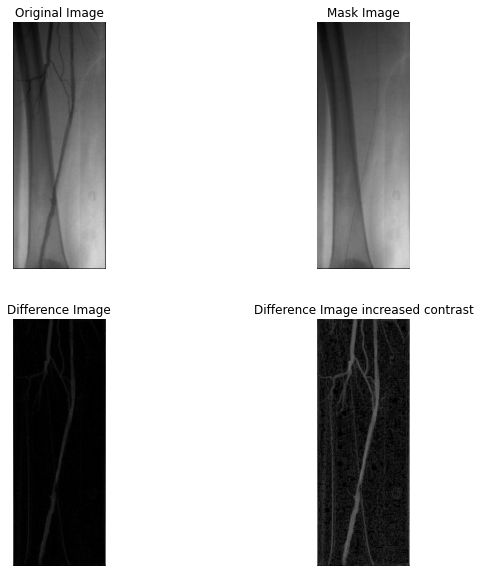

In [ ]:
# Load test images
liveImg = im2double('./images/live.jpg')
maskImg = im2double('./images/mask.jpg')
# Calculate the difference between two images
diffImg = cv2.absdiff(maskImg, liveImg)
gamma = 0.5
diffImg_contrasted = np.power(diffImg, gamma)

# Display images 
# If using the JupyterNotebook then use the below code to show images
# cv2.imshow('Original Image', liveImg)
# cv2.imshow('Mask Image', maskImg)
# cv2.imshow('Difference Image', diffImg)
# cv2.imshow('Difference Image increased contrast', diffImg_contrasted)

plt.figure(figsize=([10, 10]))
plt.subplot(221),plt.imshow(cv2.cvtColor(liveImg, cv2.COLOR_BGR2RGB)),plt.axis("off")
plt.title('Original Image')
plt.subplot(222),plt.imshow(cv2.cvtColor(maskImg, cv2.COLOR_BGR2RGB)),plt.axis("off")
plt.title('Mask Image')
plt.subplot(223),plt.imshow(cv2.cvtColor(diffImg, cv2.COLOR_BGR2RGB)),plt.axis("off")
plt.title('Difference Image')
plt.subplot(224),plt.imshow(cv2.cvtColor(diffImg_contrasted, cv2.COLOR_BGR2RGB)),plt.axis("off")
plt.title('Difference Image increased contrast')

# Save images
cv2.imwrite('Image_Subtraction.jpg',diffImg* 255)
cv2.imwrite('Image_Subtraction_with_contrast.jpg',diffImg_contrasted* 255)

# Wait for a key press and then close all windows
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## L5_2 Image Comparison



**Code MATLAB:**

In [ ]:
# %L5_2 Image Comparison
# clear, clc, close all;

# %load test images
# maskImg1 = im2double(imread('mask1.png'));
# maskImg2 = im2double(imread('mask2.png'));

# %perform image subtraction and comparison
# diffImg = abs(maskImg1 - maskImg2);
# imshow(diffImg, []), title('Difference Image');
# imwrite(diffImg, 'Mask_Compasion_diff.png');

**Code Python:**

True

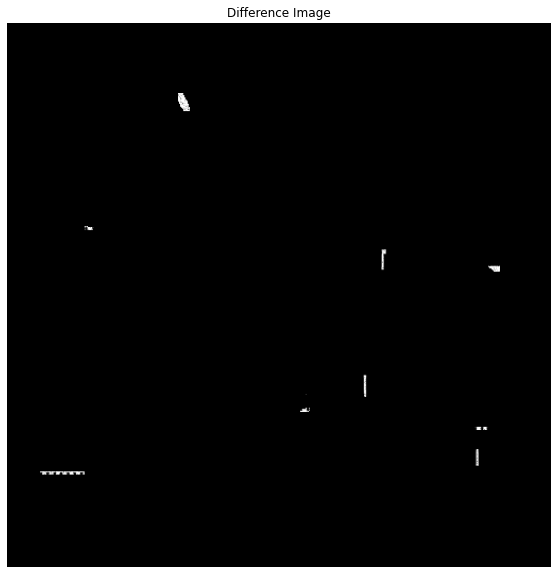

In [ ]:
#load test images
maskImg1  = im2double('./images/mask1.png')
maskImg2  = im2double('./images/mask2.png')

#perform image subtraction and comparison
diffImg = np.abs(maskImg1 - maskImg2)

plt.figure(figsize=([10, 10]))
plt.imshow(cv2.cvtColor(diffImg, cv2.COLOR_BGR2RGB)),plt.axis("off")
plt.title('Difference Image')

# Save images
cv2.imwrite('Mask_Compasion_diff.png', diffImg * 255)

## L5_3 Imaeg Averaging

**Code MATLAB:**

In [ ]:
# %L5_3 Image Averaging
# clear, clc, close all;

# %load image
# Img = im2double(rgb2gray(imread('quadnight.jfif')));

# %repeat over number of sample images
# nArray = [1 2 8 16 32 64];
# for i = 1 : numel(nArray)
#   N = nArray(i);
#   avgImg = zeros(size(Img)); %initialize an empty image

# %add Gaussian noise to each image, accumulate this image to average image
# for j = 1 : N
#   noisyImg = imnoise(Img, 'gaussian', 0, 0.01);
#   avgImg = avgImg + noisyImg;
# end %end of j

# %show image
# avgImg = avgImg / N;
# subplot(2, numel(nArray)/2, i);
# imshow(avgImg), title([num2str(N), ' image(s)']);

# end %end of sample images

**Code Python:**

In [ ]:
def concat_vh(list_2d):    
      # return final image
    return cv2.vconcat([cv2.hconcat(list_h) 
                        for list_h in list_2d])

In [ ]:
def imnoise(image, mean=0, var=0.01):
    noisy = np.zeros_like(Img, image.dtype)
    gaussian_img = cv2.randn(noisy, 0, np.sqrt(var))
    gaussian_img = Img + noisy
    
    return gaussian_img
# def imnoise(image, mean = 0, var = 0.01):
#   std = var * np.std(image) # for %5 Gaussian noise
#   noisy = np.random.normal(mean, std, size = image.shape)
#   x_noisy = cv2.add(image,noisy.astype(image.dtype))

#   return x_noisy 


In [ ]:
# Img = cv2.imread('./images/quadnight.jfif', cv2.IMREAD_GRAYSCALE)

# noisyImg = imnoise(Img, 0, 0.01)
# cv2_imshow(cv2.resize(noisyImg, dsize = (0,0),  fx = 0.5, fy = 0.5))


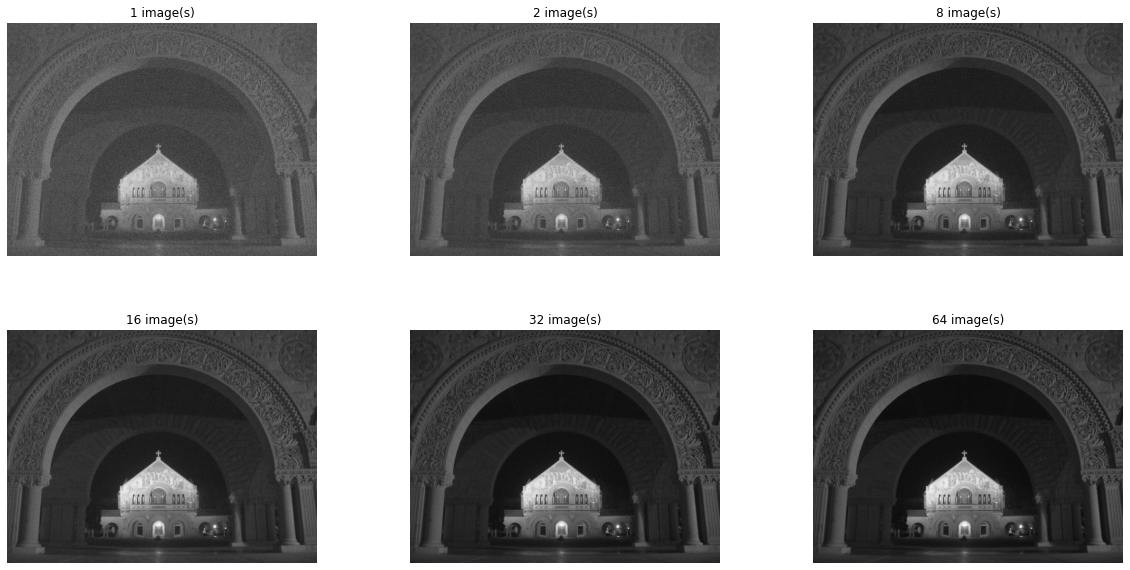

In [ ]:
# Load image
Img = im2double('./images/quadnight.jfif')

# Repeat over number of sample images
nArray = [1, 2, 8, 16, 32, 64]
axis_y = int(len(nArray)/2)

fig, axs = plt.subplots(2, axis_y, figsize=[20, 10])
fig.subplots_adjust(wspace=0.3, hspace=0.3) # set spacing between subplots

# Images = []

for i in range(len(nArray)):
    N = nArray[i]
    avgImg = np.zeros(Img.shape)  # initialize an empty image
    
    # Add Gaussian noise to each image, accumulate this image to average image
    for j in range(N):    
      avgImg += imnoise(Img, 0, 0.01)

    # Show image
    avgImg = avgImg / N  

    #Note: pyplot is displaying gray in clobal in order to get the true images => need this line
    # Images.append(cv2.resize(avgImg, dsize = (0,0),  fx = 0.5, fy = 0.5))  

    #Note: display images using pyplot
    plt.subplot(2,axis_y,i+1), plt.imshow(avgImg, cmap = 'gray'), plt.axis("off")
    plt.title(str(N) + ' image(s)')

plt.show()

In [ ]:
# show image with cv2
# cv2_imshow(concat_vh([Images[:axis_y]]))
# cv2_imshow(concat_vh([Images[axis_y:]]))